In [96]:
import pandas as pd

In [97]:
import numpy as np

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
from sklearn.ensemble import RandomForestRegressor

In [100]:
from sklearn.metrics import mean_squared_error, r2_score

In [101]:
from sklearn.preprocessing import StandardScaler

In [102]:
data = pd.read_csv('temperature.csv')

In [103]:
print(data.head())

   station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat    

In [104]:
print(data['Date'].head())

0    30-06-2013
1    30-06-2013
2    30-06-2013
3    30-06-2013
4    30-06-2013
Name: Date, dtype: object


In [105]:
data['Date'] = pd.to_datetime(data['Date'], format = '%d-%m-%Y')

In [106]:
print(data.isnull().sum())

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64


In [107]:
data = data.dropna()

In [108]:
x = data.drop(['Next_Tmax', 'Next_Tmin', 'Date'], axis=1)

In [109]:
y_max = data['Next_Tmax']
y_min = data['Next_Tmin']

In [110]:
x_train_max, x_test_max, y_train_max, y_test_max = train_test_split(x, y_max, test_size=0.2, random_state=42)

In [111]:
x_train_min, x_test_min, y_train_min, y_test_min = train_test_split(x, y_min, test_size=0.2, random_state=42)

In [112]:
rf_max = RandomForestRegressor(random_state=42)
rf_min = RandomForestRegressor(random_state=42)

In [113]:
rf_max.fit(x_train_max, y_train_max)
rf_min.fit(x_train_min, y_train_min)

RandomForestRegressor(random_state=42)

In [114]:
y_pred_rf_max = rf_max.predict(x_test_max)
y_pred_rf_min = rf_min.predict(x_test_min)

In [115]:
rmse_rf_max = np.sqrt(mean_squared_error(y_test_max, y_pred_rf_max))
rmse_rf_min = np.sqrt(mean_squared_error(y_test_min, y_pred_rf_min))

In [116]:
r2_rf_max = r2_score(y_test_max, y_pred_rf_max)
r2_rf_min = r2_score(y_test_min, y_pred_rf_min)

In [117]:
print(f'RMSE for Tmax (RF): {rmse_rf_max}')
print(f'R^2 for Tmax (RF): {r2_rf_max}')
print(f'RMSE for Tmin (RF): {rmse_rf_min}')
print(f'R^2 for Tmin (RF): {r2_rf_min}')

RMSE for Tmax (RF): 1.0046248593564115
R^2 for Tmax (RF): 0.8928298656402263
RMSE for Tmin (RF): 0.7890758182226982
R^2 for Tmin (RF): 0.8986452741884632


In [118]:
import matplotlib.pyplot as plt

In [119]:
import seaborn as sns

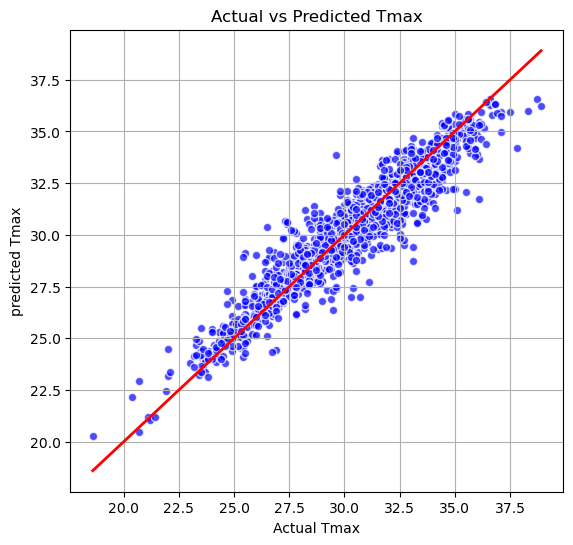

In [120]:
plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
plt.scatter(y_test_max, y_pred_rf_max, color='blue', edgecolor= 'w', alpha=0.7)
plt.plot([min(y_test_max), max(y_test_max)], [min(y_test_max), max(y_test_max)], color='red', lw=2)
plt.title('Actual vs Predicted Tmax')
plt.xlabel('Actual Tmax')
plt.ylabel('predicted Tmax')
plt.grid(True)

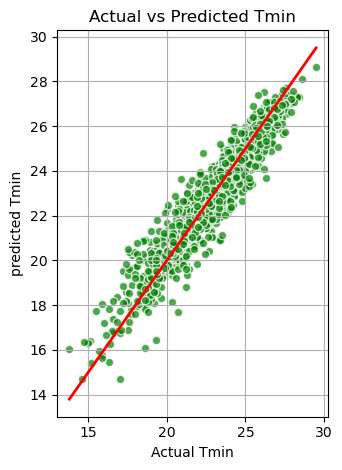

In [121]:
plt.subplot(1, 2, 2)
plt.scatter(y_test_min, y_pred_rf_min, color='green', edgecolor= 'w', alpha=0.7)
plt.plot([min(y_test_min), max(y_test_min)], [min(y_test_min), max(y_test_min)], color='red', lw=2)
plt.title('Actual vs Predicted Tmin')
plt.xlabel('Actual Tmin')
plt.ylabel('predicted Tmin')
plt.grid(True)

plt.tight_layout()
plt.show()

In [122]:
import joblib

In [123]:
joblib.dump(rf_max, 'rf_model_max.pkl')

['rf_model_max.pkl']

In [124]:
joblib.dump(rf_min, 'rf_model_min.pkl')

['rf_model_min.pkl']